# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [2]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [5]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [3]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

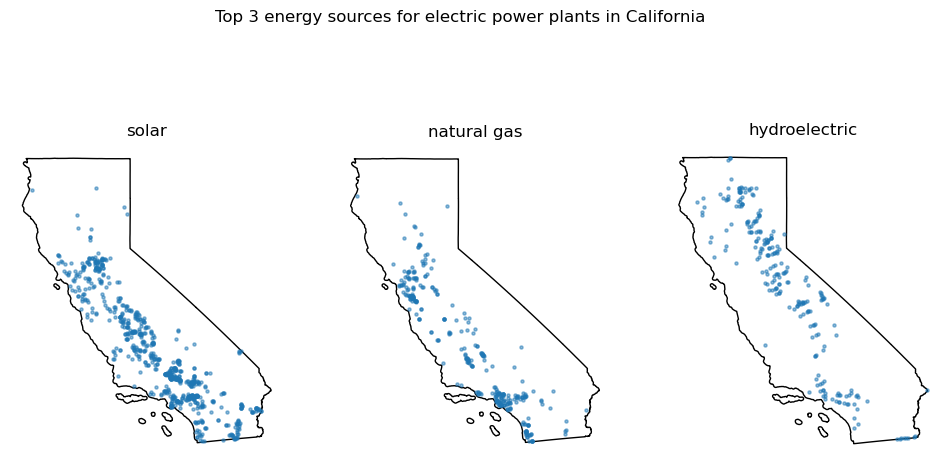

In [4]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function
My recommened steps to create a function are:
1. solve the problem for a specific example
2. identify which parts of the code need to be generalized and update these parts
3. wrap this into a function definition
4. add additional parameters or assert statements as needed
5. test function
6. add a docstring

Example: we want to obtain the top three power sources for any state programmatically as a function.

### Step 1: Solve for a specific example

Example: Solve this for California (CA)

In [7]:
state_power_plants = power_plants[power_plants['state'] == 'California']

top_sources = state_power_plants['primsource'].value_counts().nlargest(3).index.tolist()

top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 2: Identify parts to generalize

In [8]:
state = 'California'
state_power_plants = power_plants[power_plants['state'] == state]
top_sources = state_power_plants['primsource'].value_counts().index[:3].tolist()

top_sources

['solar', 'natural gas', 'hydroelectric']

## 3. Define the function

In [14]:
def top3_sources(state, power_plants):
    """
    Identify the top 3 primary energy sources for electric power plants in a given state.
    
    Args:
        state (str): The name of the state to analyze.
        
    Returns:
        list: A list of the top 3 primary energy sources in the specified state.
    """
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = state_power_plants['primsource'].value_counts().index[:3].tolist()
    return top_sources


In [15]:
top3_sources('California', power_plants)

['solar', 'natural gas', 'hydroelectric']

## Example

create a function that will produce a plot given a list of primary sources and state name. (Recreate the previous plot for any state.)

## Step 1: Solve for a specific example

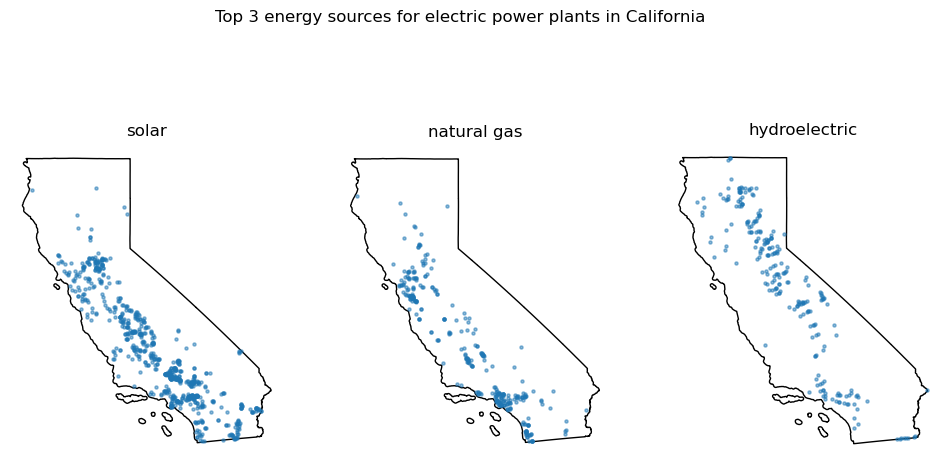

In [16]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

Step 2: Identify parts to generalize

Anything where CA is used explicitly should be changed to a variable.

In [40]:
def plot_top3_sources(state, power_plants, states):
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
    plt.show()

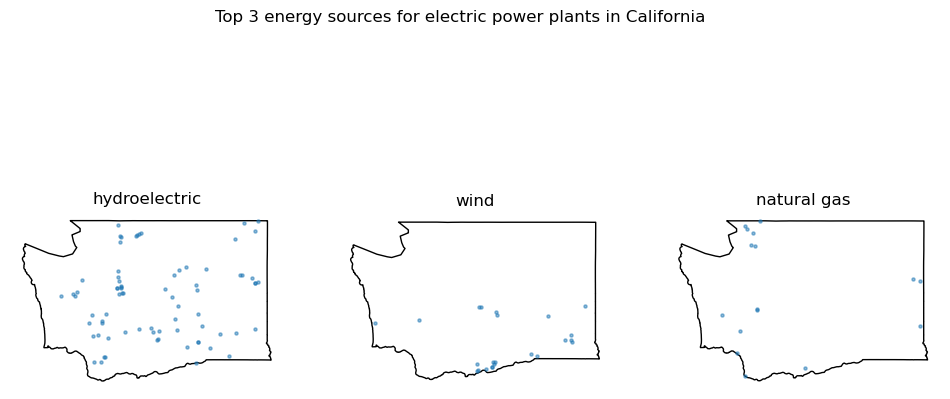

In [42]:
plot_top3_sources('Washington', power_plants, states)

## Exercise 1

Create a function called power_source_counts that, given a power source, returns a Series with the counts of power plants by state that use that source.

Follow the steps:

1. solve the problem for a specific example (e.g., ‘wind’)
2. identify which parts of the code need to be generalized and update these parts
3. wrap this into a function
4. add additional parameters or assert statements if needed

In [44]:
def power_source_counts(power_source, power_plants):

    assert power_source in power_plants['primsource'].unique(), "Power source not found in data."

    source_counts = power_plants[power_plants['primsource'] == power_source].groupby('state').size()
    
    return source_counts

power_source_counts('wind', power_plants)

state
Alaska              4
Arizona             6
California        107
Colorado           32
Connecticut         1
Delaware            1
Hawaii              8
Idaho              32
Illinois           50
Indiana            20
Iowa              121
Kansas             47
Maine              20
Maryland            5
Massachusetts      20
Michigan           34
Minnesota         122
Missouri           14
Montana            19
Nebraska           34
Nevada              1
New Hampshire       5
New Jersey          2
New Mexico         29
New York           32
North Carolina      1
North Dakota       39
Ohio               22
Oklahoma           64
Oregon             49
Pennsylvania       26
Puerto Rico         2
Rhode Island       19
South Dakota       23
Tennessee           2
Texas             215
Utah                5
Vermont             5
Virginia            1
Washington         23
West Virginia       8
Wisconsin          12
Wyoming            25
dtype: int64

## Exercise 2

1. Recreate the following plot.
2. Make a function that produces this plot for any power source.
3. Brainstorm ways in which your function might break or not produced the desired output.

In [66]:
def plot_top3_power_source_states(power_source, power_plants, states):
    
    power_source_counts_top_3 = power_source_counts(power_source, power_plants).sort_values(ascending=False).index[:3].tolist()

    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    for axis, state in zip(ax, power_source_counts_top_3):   # Iterate over subplots and energy sources
        
        print(state)
        
        state_boundary = states[states['name'] == state]

        axis.set_title(state)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        state_power_plants = power_plants[power_plants['state'] == state]
        source_subset = state_power_plants[state_power_plants['primsource'] == power_source]


        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)
    
    plt.title = f"Top 3 states with most '{power_source}'-powered plants"
  

['Texas', 'Minnesota', 'Iowa']
[215, 122, 121]
Texas
Minnesota
Iowa


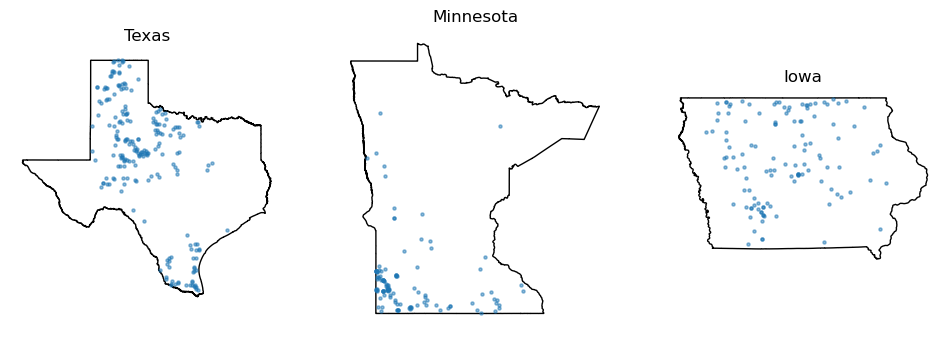

In [71]:
plot_top3_power_source_states('wind', power_plants, states)


In [72]:
def plot_top3_power_source_states(power_source, power_plants, states):
    
    power_source_top_3_states = power_source_counts(power_source, power_plants).sort_values(ascending=False).index[:3].tolist()

    power_source_counts_top_3 = power_source_counts(power_source, power_plants).sort_values(ascending=False).iloc[0:3].tolist()

    print(power_source_top_3_states)
    print(power_source_counts_top_3)


    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    for axis, state, count in zip(ax, power_source_top_3_states, power_source_counts_top_3):   # Iterate over subplots and energy sources
        
        print(state)
        
        state_boundary = states[states['name'] == state]

        axis.set_title(f'{state} ({count} power plants)')
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        state_power_plants = power_plants[power_plants['state'] == state]
        source_subset = state_power_plants[state_power_plants['primsource'] == power_source]


        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)
    
    plt.title = f"Top 3 states with most '{power_source}'-powered plants"
  

['Texas', 'Minnesota', 'Iowa']
[215, 122, 121]
Texas
Minnesota
Iowa


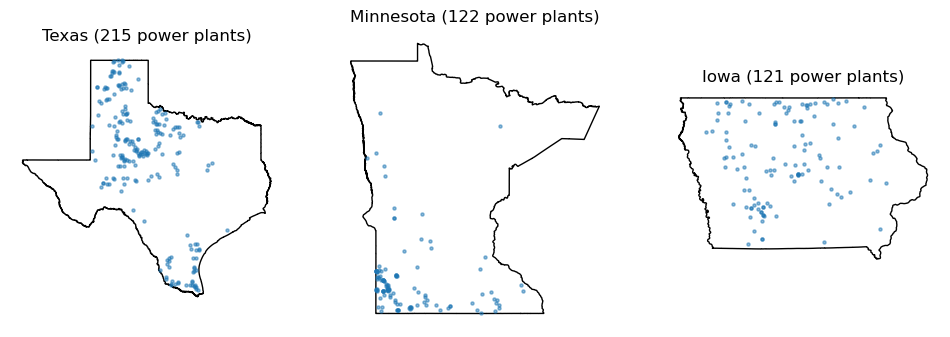

In [73]:
plot_top3_power_source_states('wind', power_plants, states)
